# Example usage

In this document we will demonstrate how to use all of functions in the ``dsci_310_group_11`` package.

We'll first load the example wine data set to demonstrate the functions of our package.

In [14]:
import pandas as pd
df = pd.read_csv("data/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Preprocess the data

We can use the ``preprocessor()`` function to preprocess the wine data. This function not only creates a new "target" variable for dataframe df, but also conduct a 70:30 data splitting. The first input of this function is the wine data set, and the second input decides whether training or testing data will be return. Putting 0 will return training data and 1 will return testing data.  

In [15]:
from dsci_310_group_11_pkg.preprocess import preprocessor

training_data = preprocessor(df,0)
testing_data = preprocessor(df, 1)

training_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000,6,1
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.400000,5,0
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667,6,1
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8,1
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.800000,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.300000,6,1
1346,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.400000,5,0
1406,8.2,0.240,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.900000,6,1
1389,6.7,0.480,0.02,2.2,0.080,36.0,111.0,0.99524,3.10,0.53,9.700000,5,0


## Creating Pipeline

After we have the training dataset, we can now create a pipeline object (predictive model) using the ``pipe_build()`` function. But before using this function we first need to split the data into x_train (model features) and y_train (target variables).

In [16]:
x = training_data.drop(columns = ["target"])
y = training_data["target"]

``pipe_build()`` takes three argument: <br>

- first argument takes a string that represent the model type, it can be "dummy", "lr", "svm", "dtc", or "bayes". 
    - "dummy" stands for dummy model
    - "lr" stands for logistic regression model
    - "svm" stands for support vector machine model
    - "dtc" stands for decision tree model
    - "bayes" stands for Gaussian Naive Bayes model
- second argument is x_train data
- third argument is y_train data

Let's create a logistic regression model as example:

In [17]:
from dsci_310_group_11_pkg.pipeline import pipe_build

logistic_model = pipe_build("lr" , x , y)
logistic_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    random_state=1234))])

## Hyperparameter Tuning

We can also use ``hp_optimizer()`` to conduct hyperparameter tuning. The input argument are the same as the ``pipe_build()`` function. However, instead of returning a model object with default parameter, this function will return the results of cross validation scores of different hyperparameters in a dataframe. The following code use logistic regression model as example.

In [18]:
from dsci_310_group_11_pkg.optimize import hp_optimizer 

logistic_model_hp = hp_optimizer("lr" , x , y)
logistic_model_hp

,C,mean_train_scores,mean_cv_scores
0,0.0001,0.544906,0.545127
1,0.0010,0.924262,0.920480
2,0.0100,0.989499,0.987492
3,0.1000,1.000000,1.000000
4,1.0000,1.000000,1.000000
5,10.0000,1.000000,1.000000
6,100.0000,1.000000,1.000000
7,1000.0000,1.000000,1.000000
8,10000.0000,1.000000,1.000000
9,100000.0000,1.000000,1.000000


## Correlation Table

This package contains various graphing functions. The ``correlation_table()`` function takes a dataframe and return a JSON object of a correlation table of each variable.

In [19]:
from dsci_310_group_11_pkg.grapher import correlation_table

In [20]:
ctb = correlation_table(df)

## Bar Chart

The ``bar_chart()`` function displays a simple bar chart of the count of the quality variable. The input of this function is a dataframe object, and it returns a JSON object of bar chart.   

In [21]:
from dsci_310_group_11_pkg.grapher import bar_chart

bar = bar_chart(df)

## Model Metrics Graph

The ``class_report()`` function takes a model, corresponding data and displays the heatmap of different metrics. 
- First input is the model
- Second input is the features data
- Third input is the label data

The following use the training data as example.

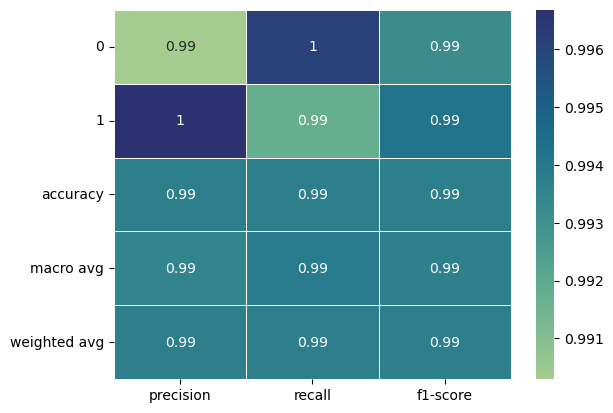

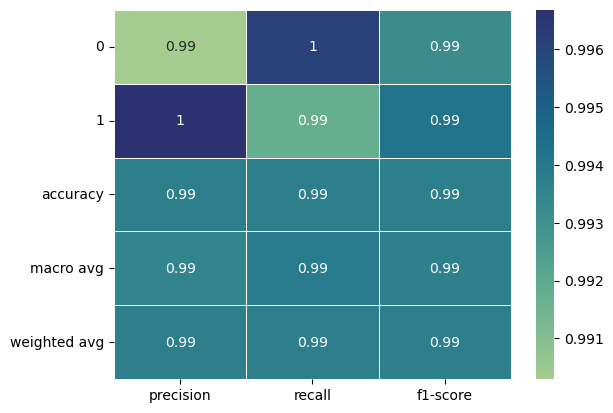

In [22]:
from dsci_310_group_11_pkg.grapher import class_report

class_report(logistic_model, x, y)

## Decision Tree Visualization

``vis_tree()`` function displays a visual example of a decision tree for conceptual purposes. The max_depth variable is limited to 3 so that the visualization is interpretable. It takes the following inputs:
1. X_train - a dataframe object containing prediction features
2. y_train - a series object containing target variables.
    

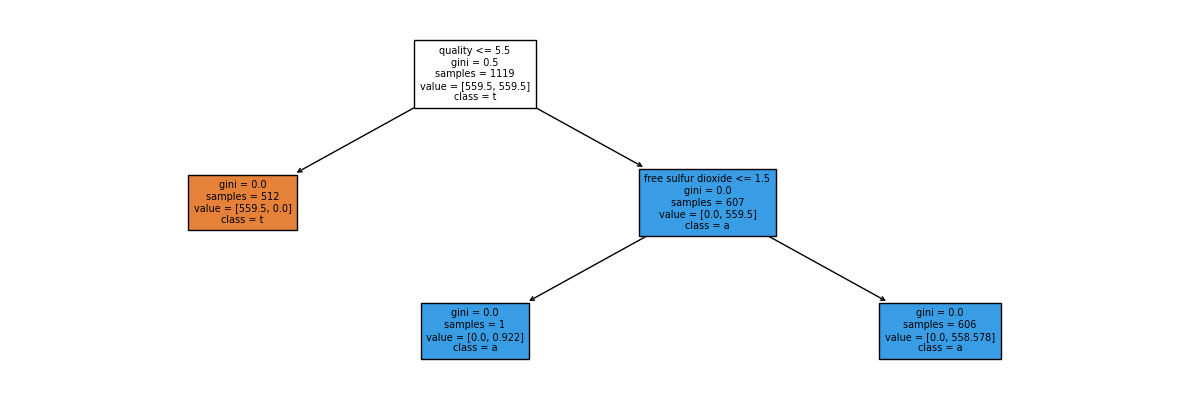

In [23]:
from dsci_310_group_11_pkg.grapher import vis_tree

vis_tree(x,y)

## Logistic Coefficient Visualization

``show_coefficient()`` can visualize the coefficient of logistic regression model.  It takes the following inputs and return a dataframe that contains coefficient for each feature:
1. pipe - a pipeline object containing scikit-learn model transformers, and a scikit-learn model.
2. X_train - a dataframe object containing prediction features.

In [24]:
from dsci_310_group_11_pkg.grapher import show_coefficients

show_coefficients(logistic_model, x)

,features,coefficients
11,quality,1.505752
10,alcohol,0.320946
9,sulphates,0.168452
8,pH,0.038052
0,fixed acidity,0.037339
2,citric acid,0.024162
3,residual sugar,0.023796
5,free sulfur dioxide,0.003958
4,chlorides,-0.081225
7,density,-0.106589


## Prediction Visualization

``show_correct()`` can visualize the predicted result of chosen predictive model in a table. It takes the following inputs:
1. pipe - a pipeline object containing scikit-learn model transformers, and a scikit-learn model.
2. x - a dataframe object containing prediction features.
3. y - a series object containing target variables.

The following use the training data as example.

In [25]:
from dsci_310_group_11_pkg.grapher import show_correct

show_correct(logistic_model, x, y)

correct
True     1112
False       7
Name: count, dtype: int64

## Model Comparison Visualization

``compare_scores()`` take one input **'lst'** and return a json object of a bar chart comparing the accuracy scores of each ML model in the *'lst'* list. The bar chart where the highlighted bar is the highest score. The following uses logistic regression model and dummy model as example.

In [26]:
from dsci_310_group_11_pkg.grapher import compare_scores

base = pipe_build('dummy', x, y)    
lr = pipe_build('lr', x, y)
svm = pipe_build('svm', x, y)
dtc = pipe_build('dtc', x, y)
nb = pipe_build('bayes', x, y)

# Score the models
basescore = base.score(x, y)
lrscore = lr.score(x, y)
svcscore = svm.score(x, y)
dtscore = dtc.score(x, y)
nbscore = nb.score(x, y)

cscores = [basescore, lrscore, svcscore, dtscore, nbscore]

compare_scores(cscores)

'{\n  "$schema": "https://vega.github.io/schema/vega-lite/v4.17.0.json",\n  "config": {\n    "background": "lightgrey",\n    "view": {\n      "continuousHeight": 300,\n      "continuousWidth": 400\n    }\n  },\n  "data": {\n    "name": "data-35a5fa1c6eecf9ec5a0bea83a0d4f7a4"\n  },\n  "datasets": {\n    "data-35a5fa1c6eecf9ec5a0bea83a0d4f7a4": [\n      {\n        "Score": 0.5424486148346738,\n        "index": "Baseline"\n      },\n      {\n        "Score": 0.9937444146559428,\n        "index": "LR"\n      },\n      {\n        "Score": 0.9973190348525469,\n        "index": "SVC"\n      },\n      {\n        "Score": 1.0,\n        "index": "DT"\n      },\n      {\n        "Score": 0.9749776586237712,\n        "index": "NB"\n      }\n    ]\n  },\n  "encoding": {\n    "color": {\n      "condition": {\n        "test": "(datum.Score === 1.0)",\n        "value": "red"\n      },\n      "value": "steelblue"\n    },\n    "x": {\n      "field": "Score",\n      "type": "quantitative"\n    },\n    "y